In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [59]:
import pandas as pd
load_data = pd.read_csv('mnist_train.csv')

In [112]:
load_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# numpy softmax activation func implementation
def my_softmax(z):
    N = len(z)
    a = np.zeros(N)
    sum = 0
    for i in range(N):
        sum += np.exp(z[i])
    for j in range(N):
        a[j] = np.exp(z[i])/sum
    return a

In [62]:
y = load_data['label']

In [63]:
X = load_data.drop(['label'], axis = 1)

In [64]:
X.shape

(60000, 784)

In [70]:
X = X.to_numpy()

In [65]:
y.shape

(60000,)

In [71]:
y = y.to_numpy()

In [74]:
RES = list(set(y))
RES

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

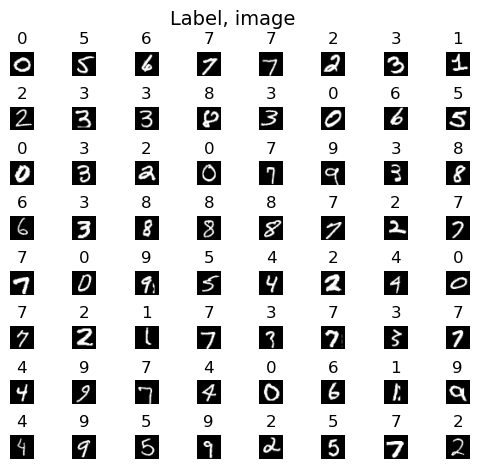

In [73]:
import matplotlib.pyplot as plt

m, n = X.shape
fig, axes = plt.subplots(8,8, figsize=(5, 5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((28, 28))
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [76]:
tf.random.set_seed(1234) # for consistency
model=Sequential([
    tf.keras.Input(shape=(784,)), # input shape
    Dense(units=25, activation='relu', name='L1'),
    Dense(units=15, activation='relu', name='L2'),
    Dense(units=10, activation='linear', name='L3'),
], name='my_model'
) # If output probabilities are desired, apply a softmax function

In [77]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
[layer1, layer2, layer3] = model.layers

In [79]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [103]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
)
history = model.fit(
    X, y,
    epochs=80
)

Epoch 1/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - loss: 0.1222  
Epoch 2/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - loss: 0.1204
Epoch 3/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - loss: 0.1199
Epoch 4/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - loss: 0.1195
Epoch 5/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - loss: 0.1193
Epoch 6/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - loss: 0.1191
Epoch 7/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - loss: 0.1190
Epoch 8/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - loss: 0.1189
Epoch 9/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - loss: 0.1188
Epoch 10/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - loss: 0.1187
Epoch 11/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - loss: 0.1187
Epoch 12/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - loss: 0.1186
Epoch 13/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - loss: 0.1185
Epoch 14/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - loss: 0.1185

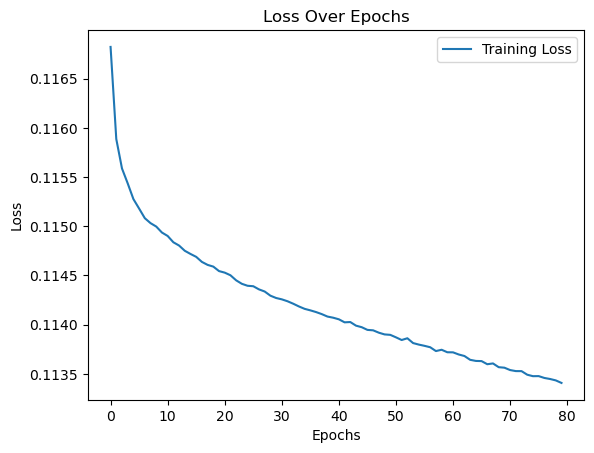

In [104]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [105]:
load_test_dataset = pd.read_csv('mnist_test.csv')

In [107]:
X = load_test_dataset.drop(['label'], axis = 1)
y = load_test_dataset['label']

In [109]:
X = X.to_numpy()
y = y.to_numpy()

In [111]:
u, v = X.shape

In [114]:
P = len(X)
prediction = np.zeros(len(y))
for rows in range(u):
    prediction[rows] = model.predict(X[rows].reshape(1, 784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


ValueError: setting an array element with a sequence.

In [115]:
print(u)

10000


In [116]:
print(v)

784
